In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("archives/data/reviews.csv")

In [3]:
df

,id_review,review,title,score,likes,id_nick,service,date,platform
0,R1245,Muy buena presentación y servicio sin embargo ...,Muy buena presentación y servicio,3.0,0,uisahelenad2018,71036.0,1 years ago,tripadvisor
1,R1246,Desde la presentación de los platos a la calid...,Una experiencia,5.0,0,turrutia,71036.0,1 years ago,tripadvisor
2,R1247,El mejor lugar para reencontrame con mis amigo...,Felicitaciones a Statera!,5.0,0,orthStar25333985745,71036.0,1 years ago,tripadvisor
3,R1248,Excelente experiencia Comida maravillosa con e...,Aniversario de boda,5.0,0,atima J,71036.0,1 years ago,tripadvisor
4,R1249,Mi pasión es viajar y disfrutar de las grandez...,No te lo querrás perder!,5.0,0,nbocadoalmundo,71036.0,1 years ago,tripadvisor
...,...,...,...,...,...,...,...,...,...
1258430,R1714813,"Porque tiene muy buenos precios, es un lugar c...",,5.0,0,107337795564637304722,71010.0,4 years ago,googleplaces
1258431,R1714814,😀 productos con precious comodos,,5.0,0,117172490424310221229,71010.0,2 years ago,googleplaces
1258432,R1714815,Es agradable comprar ahi,,4.0,0,118317711342407089434,71010.0,12 months ago,googleplaces
1258433,R1714816,"Es agradable, pero no me agrada mucho la tenue...",,3.0,0,108401684048178232761,71010.0,4 years ago,googleplaces


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258435 entries, 0 to 1258434
Data columns (total 9 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id_review  1258435 non-null  object 
 1   review     755066 non-null   object 
 2   title      1258435 non-null  object 
 3   score      1258435 non-null  float64
 4   likes      1258435 non-null  int64  
 5   id_nick    1258435 non-null  object 
 6   service    1258435 non-null  float64
 7   date       1258435 non-null  object 
 8   platform   1258435 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 86.4+ MB


In [5]:
df.isna().sum()

id_review         0
review       503369
title             0
score             0
likes             0
id_nick           0
service           0
date              0
platform          0
dtype: int64

In [6]:
df.drop(columns=["id_nick","date","platform", "title", "likes", "service"], inplace=True)
df

,id_review,review,score
0,R1245,Muy buena presentación y servicio sin embargo ...,3.0
1,R1246,Desde la presentación de los platos a la calid...,5.0
2,R1247,El mejor lugar para reencontrame con mis amigo...,5.0
3,R1248,Excelente experiencia Comida maravillosa con e...,5.0
4,R1249,Mi pasión es viajar y disfrutar de las grandez...,5.0
...,...,...,...
1258430,R1714813,"Porque tiene muy buenos precios, es un lugar c...",5.0
1258431,R1714814,😀 productos con precious comodos,5.0
1258432,R1714815,Es agradable comprar ahi,4.0
1258433,R1714816,"Es agradable, pero no me agrada mucho la tenue...",3.0


In [7]:
import transformers
from transformers import pipeline, AutoTokenizer
import torch

# Comprobar si hay una GPU disponible
device = 0 if torch.cuda.is_available() else -1
 
# https://huggingface.co/docs/transformers/main_classes/logging
transformers.utils.logging.set_verbosity_error()

In [8]:
nlp = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment", device=device)

c:\Users\nicol\miniconda3\envs\ia\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [9]:
t = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

def tokenizar(sr:pd.Series):
    if len(t.tokenize(sr)) > 512:
        print("pito0")
        segments = [sr[i: i+512] for i in range(0, len(sr.split(" ")), 512)]
        result = [float(nlp(segment)[0]["label"].split(" ")[0]) for segment in segments]
        return np.average(result)
    return float(nlp(sr)[0]["label"].split(" ")[0])

df.dropna(subset=["review"], inplace=True)

# Es recomendable hacer esto, ya que el dataset tiene +1millon de entradas
df = df[:500]
# df["predict"] = pd.Series([float(nlp(i)[0]["label"].split(" ")[0]) for i in df["review"]]) 
df["predict"] = df["review"].apply(tokenizar)

C:\Users\nicol\AppData\Local\Temp\ipykernel_2356\1781215697.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["predict"] = df["review"].apply(tokenizar)


In [10]:
df

,id_review,review,score,predict
0,R1245,Muy buena presentación y servicio sin embargo ...,3.0,3.0
1,R1246,Desde la presentación de los platos a la calid...,5.0,4.0
2,R1247,El mejor lugar para reencontrame con mis amigo...,5.0,5.0
3,R1248,Excelente experiencia Comida maravillosa con e...,5.0,5.0
4,R1249,Mi pasión es viajar y disfrutar de las grandez...,5.0,5.0
...,...,...,...,...
495,R3285,"excelente comida, excelente atencion, la verda...",5.0,5.0
496,R3286,Concurrí en familia. Buena ubicación y ambient...,5.0,4.0
497,R3287,La Cabrera de Miraflores fue una muy buena ele...,5.0,5.0
498,R3288,"la atención de los meseros es deficiente, no s...",3.0,2.0


<Axes: ylabel='Density'>

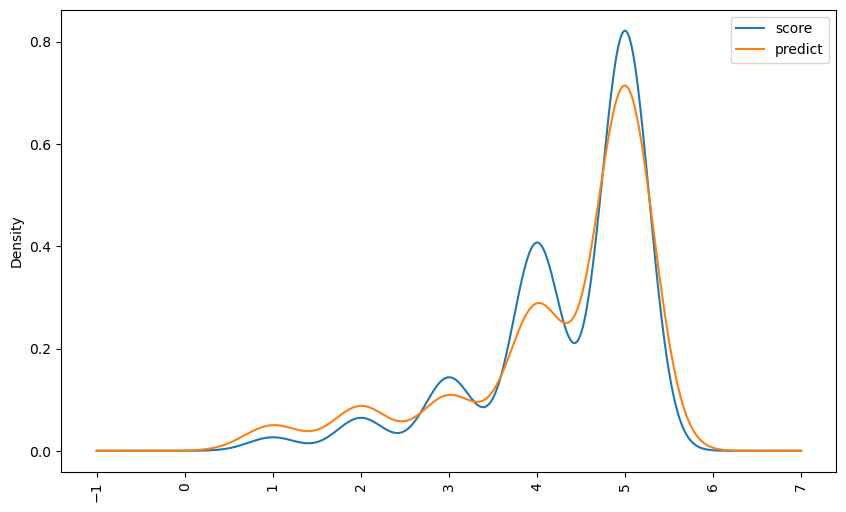

In [11]:
df.plot.density(x="id_review", y=["score", "predict"], 
                rot=90, figsize=(10,6))

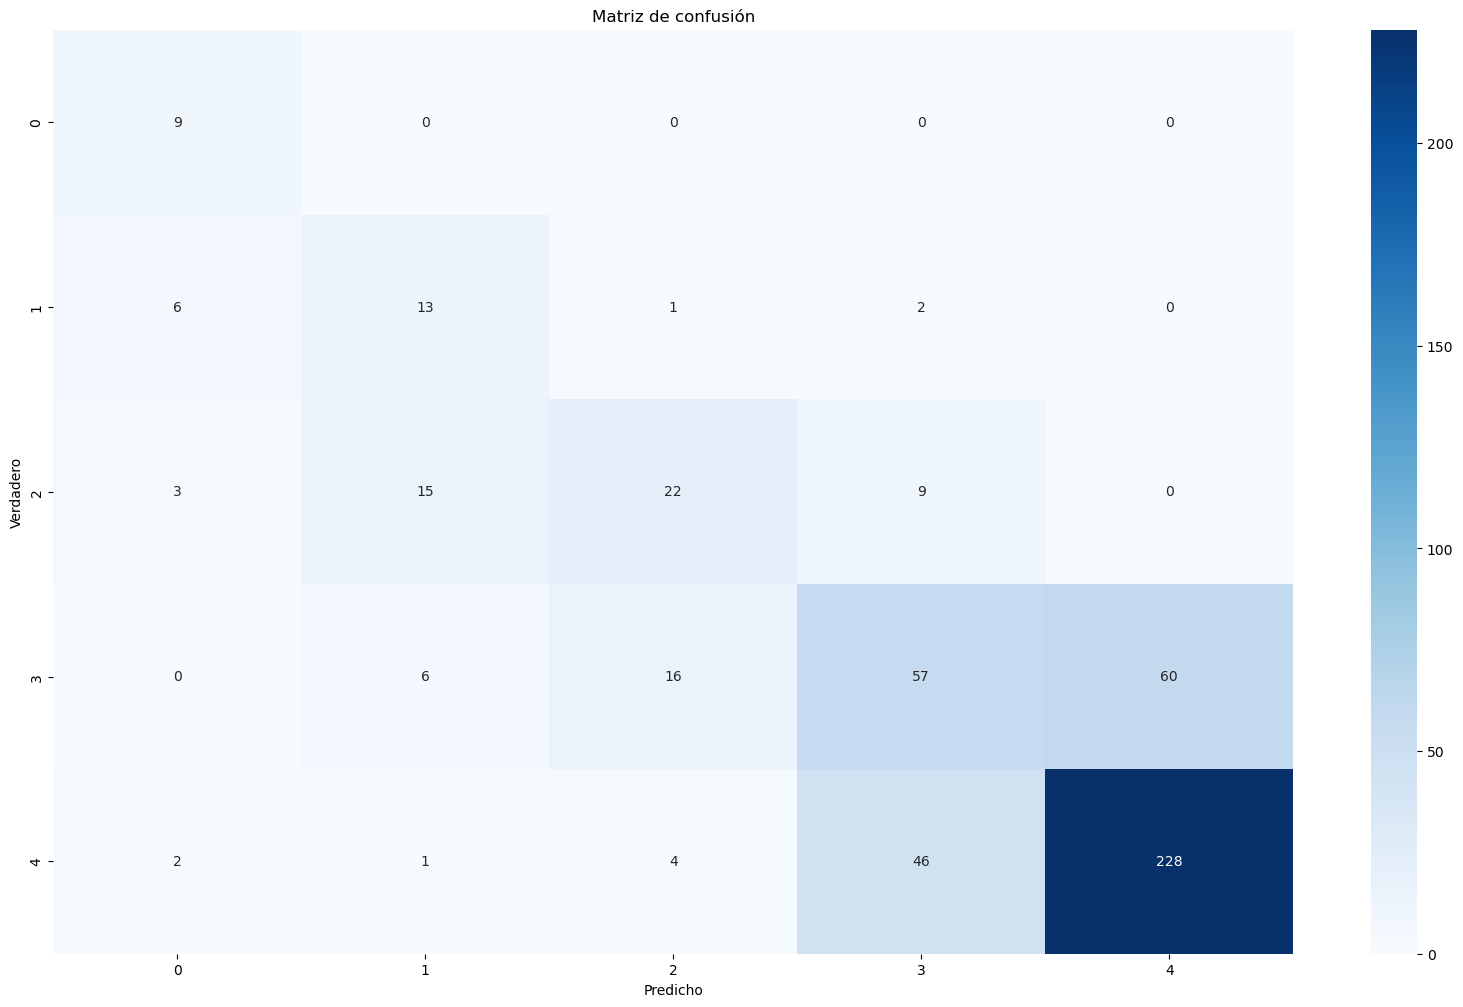

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(df['score'].astype(int), df['predict'].astype(int))

plt.figure(figsize=(20, 12))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.title('Matriz de confusión')
plt.show()